# 3조  전기차 충전소와 아파트 가격 데이터의 관계

                                                                                     ### 김평두, 이정해, 박민설                                                                          

## 0. 주제 선정 이유

In [ ]:
# 저희 3조는 금융데이터 중 부동산 데이터인 아파트 거래금액 데이터를 활용

# 관련된 기사는 미국 조사라서 한국은 어떨까라는 궁금증에 시작

# 두 데이터 간 인과관계나 선호관계를 분석해보기 보다는 데이터들을 불러서 저장하고 시각화해보는 것에 의의두고 시작

## 1. 전기차 충전소 open api 데이터 정리

In [1]:
# 전기차 충전소 파일(api 크롤링한 엑셀파일) 불러오기

import csv
import pandas as pd
ev = pd.read_csv('C:\\Users\\user\\OneDrive\\바탕 화면\\핀테크 양성과정\\4_프로젝트(금융 데이터 분석)\\프로젝트 엑셀\\ev_seoul.csv', encoding='cp949')
print(ev)
ev_data = pd.DataFrame({'주소':ev['addr']})
ev_new = ev_data[ev_data['주소'].notnull()]  # 데이터에 2개의 null 값이 있어서 null 값 있는 행은 제외

      Unnamed: 0                                     addr            busiNm  \
0              0        서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역               환경부   
1              1   서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞               환경부   
2              2                서울특별시 중구 동호로 287, 대형버스주차장               환경부   
3              3            서울특별시 용산구 한남동 산10-84, 지상실외주차장               환경부   
4              4  서울특별시 성동구 성수이로26길 61, 지상주차장 입구 좌측 경비실 옆               환경부   
...          ...                                      ...               ...   
8518        8518                       서울특별시 서초구 반포대로 275  evPlug(타디스테크놀로지)   
8519        8519                       서울특별시 서초구 반포대로 275  evPlug(타디스테크놀로지)   
8520        8520                       서울특별시 서초구 반포대로 275  evPlug(타디스테크놀로지)   
8521        8521                       서울특별시 서초구 반포대로 275  evPlug(타디스테크놀로지)   
8522        8522                       서울특별시 서초구 반포대로 275  evPlug(타디스테크놀로지)   

     powerType  stat                    statNm  
0 

In [2]:
# 전기차 데이터에서 구 이름만 뽑은 리스트

ev_ls = []
for i in ev_new['주소'] :
    addr_list = list(i.split(" "))
    #print(addr_list[1])
    ev_ls.append(addr_list[1])  
print(ev_ls[:100]) # 100개만 출력

['종로구', '종로구', '중구', '용산구', '성동구', '성동구', '동대문구', '동대문구', '중랑구', '성북구', '성북구', '강북구', '도봉구', '은평구', '은평구', '마포구', '마포구', '마포구', '양천구', '양천구', '강서구', '강서구', '강서구', '구로구', '구로구', '구로구', '금천구', '금천구', '금천구', '영등포구', '동작구', '동작구', '관악구', '서초구', '서초구', '강남구', '강남구', '강남구', '강남구', '강남구', '송파구', '강동구', '강남구', '강남구', '강동구', '강동구', '강동구', '강서구', '강서구', '강서구', '강서구', '강서구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '광진구', '구로구', '노원구', '노원구', '노원구', '노원구', '동대문구', '동작구', '마포구', '마포구', '서대문구', '서대문구', '서초구', '서초구', '송파구', '송파구', '송파구', '송파구', '영등포구', '영등포구', '영등포구', '영등포구', '영등포구', '용산구', '용산구', '은평구', '은평구', '종로구', '종로구', '중구', '중구', '중랑구', '중랑구', '중랑구', '서초구', '서초구', '강남구', '서대문구', '동작구', '도봉구', '금천구', '금천구']


In [3]:
# 서울시에서 정한 25개 구 순서에 따른 리스트
# 텍스트 파일에 먼저 저장한 후 불러옴
f = open('C:\\Users\\user\\OneDrive\\바탕 화면\\핀테크 양성과정\\4_프로젝트(금융 데이터 분석)\\프로젝트 엑셀\\지역구 순서.txt', encoding = 'utf-8')
gu = []
for line in f:
    gu_list = line.split()
    #print(gu_list[1])
    gu.append(gu_list[1])
print(gu)
    
f.close()


['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']


In [4]:
# 구별 전기차 충전소 개수

gu_num = []

for i in range (0, len(gu)):
    gu_num.append(ev_ls.count(gu[i]))
print(gu_num)

[183, 251, 303, 448, 132, 345, 328, 407, 136, 212, 369, 325, 244, 362, 395, 542, 438, 322, 363, 299, 238, 647, 522, 475, 233]


In [5]:
# 구 이름과 구별 전기차 충전소 갯수를 DataFrame으로 표현

result = pd.DataFrame({'구':gu,'충전소 개수':gu_num})
result

,구,충전소 개수
0,종로구,183
1,중구,251
2,용산구,303
3,성동구,448
4,광진구,132
5,동대문구,345
6,중랑구,328
7,성북구,407
8,강북구,136
9,도봉구,212


## 2. 국토교통부 아파트 공시지가 데이터 정리

In [7]:
# 서울시 아파트 파일 불러오기(25평대, 2021년)

apart = pd.read_csv('C:\\Users\\user\\OneDrive\\바탕 화면\\핀테크 양성과정\\4_프로젝트(금융 데이터 분석)\\프로젝트 엑셀\\seoul_apart.csv', encoding='cp949')
print(apart)

                시군구       단지명     전용면적    계약년월  계약일    거래금액   층  건축년도  \
0     서울특별시 강남구 개포동  개포주공 6단지  73.0200  202102   28  240500   7  1983   
1     서울특별시 강남구 개포동  개포주공 7단지  60.7600  202101    7  200000   9  1983   
2     서울특별시 강남구 개포동  개포주공 7단지  73.2600  202101   30  235000   1  1983   
3     서울특별시 강남구 개포동  개포현대200동  82.2000  202101   22  192000   8  1986   
4     서울특별시 강남구 개포동  디에이치아너힐즈  84.6348  202101   22  274000  20  2019   
...             ...       ...      ...     ...  ...     ...  ..   ...   
4787  서울특별시 중랑구 중화동      한신1차  84.0300  202102    4   80000   3  1997   
4788  서울특별시 중랑구 중화동       한신2  84.0300  202101    9   81000  21  1998   
4789  서울특별시 중랑구 중화동       한신2  84.0300  202101   12   82500  15  1998   
4790  서울특별시 중랑구 중화동       한신2  84.0300  202101   22   82500  19  1998   
4791  서울특별시 중랑구 중화동       한신2  84.0300  202102    2   79800   6  1998   

          도로명  해제사유발생일  
0     개포로 516      NaN  
1     개포로 516      NaN  
2     개포로 516      NaN  
3     언주로 105      NaN 

In [30]:
# 아파트 데이터에서 구 이름만 뽑아내기

apart_ls = []
for i in apart['시군구'] :
    addr_list = list(i.split(" "))
    #print(addr_list[1])
    apart_ls.append(addr_list[1])  # 서울특별시 : 0 / 00구 : 1 / 이하 주소 : 2

In [31]:
#  금액 /  면적 = m2당 가격 새로운 변수 생성

average=round(apart['거래금액']/apart['전용면적'],0)
apart_list=pd.DataFrame({'주소':apart_ls,'금액':apart['거래금액'],'면적':apart['전용면적'],'m2당 가격':average})
apart_list

,주소,금액,면적,m2당 가격
0,강남구,240500,73.0200,3294.0
1,강남구,200000,60.7600,3292.0
2,강남구,235000,73.2600,3208.0
3,강남구,192000,82.2000,2336.0
4,강남구,274000,84.6348,3237.0
...,...,...,...,...
4787,중랑구,80000,84.0300,952.0
4788,중랑구,81000,84.0300,964.0
4789,중랑구,82500,84.0300,982.0
4790,중랑구,82500,84.0300,982.0


In [10]:
# 구 별 (m2 당 가격)의 합계

res = []

for j in range(len(gu)):
    sum = 0
    for i in range(len(apart_list)):
        if apart_list.iloc[i][0] == gu[j]:
            sum += apart_list.iloc[i][3]  
    res.append(sum)
print(res)

[62825.0, 74205.0, 92279.0, 266648.0, 172103.0, 167417.0, 126276.0, 289069.0, 109836.0, 216549.0, 316664.0, 156688.0, 198723.0, 283066.0, 359933.0, 284740.0, 271606.0, 90944.0, 305364.0, 280224.0, 152258.0, 498529.0, 506124.0, 475181.0, 376986.0]


In [11]:
# apart_num : 구별 아파트의 개수 합계
apart_num = []

for i in range (0, len(gu)):
    #print(ls_apart.count(gu[i]))
    apart_num.append(apart_ls.count(gu[i]))    
print(apart_num)

[49, 58, 57, 158, 111, 151, 149, 279, 127, 278, 326, 173, 166, 192, 267, 278, 299, 113, 225, 199, 155, 203, 249, 241, 289]


In [12]:
# 아파트 가격 합계 / 아파트 갯수 = 구별 평균가격
avg_price = []

for i in range(len(res)):
    avg_price.append(int(res[i]/apart_num[i]))
print(avg_price)

[1282, 1279, 1618, 1687, 1550, 1108, 847, 1036, 864, 778, 971, 905, 1197, 1474, 1348, 1024, 908, 804, 1357, 1408, 982, 2455, 2032, 1971, 1304]


In [13]:
# result_new : 구별 아파트 평균 가격
result_new = pd.DataFrame({'구':gu,'평당 가격':avg_price},index=list(range(1,26)))
result_new

,구,평당 가격
1,종로구,1282
2,중구,1279
3,용산구,1618
4,성동구,1687
5,광진구,1550
6,동대문구,1108
7,중랑구,847
8,성북구,1036
9,강북구,864
10,도봉구,778


# 3. 시각화(지도, 그래프)

### 3.1 지도 시각화 

In [14]:
# 전기차 충전소 갯수 지도시각화

import json # skorea_json은 따로 파일을 받아서 설치
import folium  # folium 라이브러리 사용
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

geo_path = 'C:\\Users\\user\\OneDrive\\바탕 화면\\핀테크 양성과정\\4_프로젝트(금융 데이터 분석)\\프로젝트 엑셀\\skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=result,
              columns=['구','충전소 개수'],
              fill_color='PuRd',
              key_on='feature.id')

map

In [15]:
#  아파트 평균가격 지도시각화

map2 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map2.choropleth(geo_data=geo_str,
              data=result_new,
              columns=['구','평당 가격'],
              fill_color='PuRd',
              key_on='feature.id')
map2

### 3.2 산점도 시각화

In [16]:
# 충전소 개수와 평당 가격 동시에 DataFrame에 표시

result_new1 = pd.DataFrame({'구':gu,'충전소 개수':gu_num,'평당 가격':avg_price},index=list(range(1,26)))
result_new1

,구,충전소 개수,평당 가격
1,종로구,183,1282
2,중구,251,1279
3,용산구,303,1618
4,성동구,448,1687
5,광진구,132,1550
6,동대문구,345,1108
7,중랑구,328,847
8,성북구,407,1036
9,강북구,136,864
10,도봉구,212,778


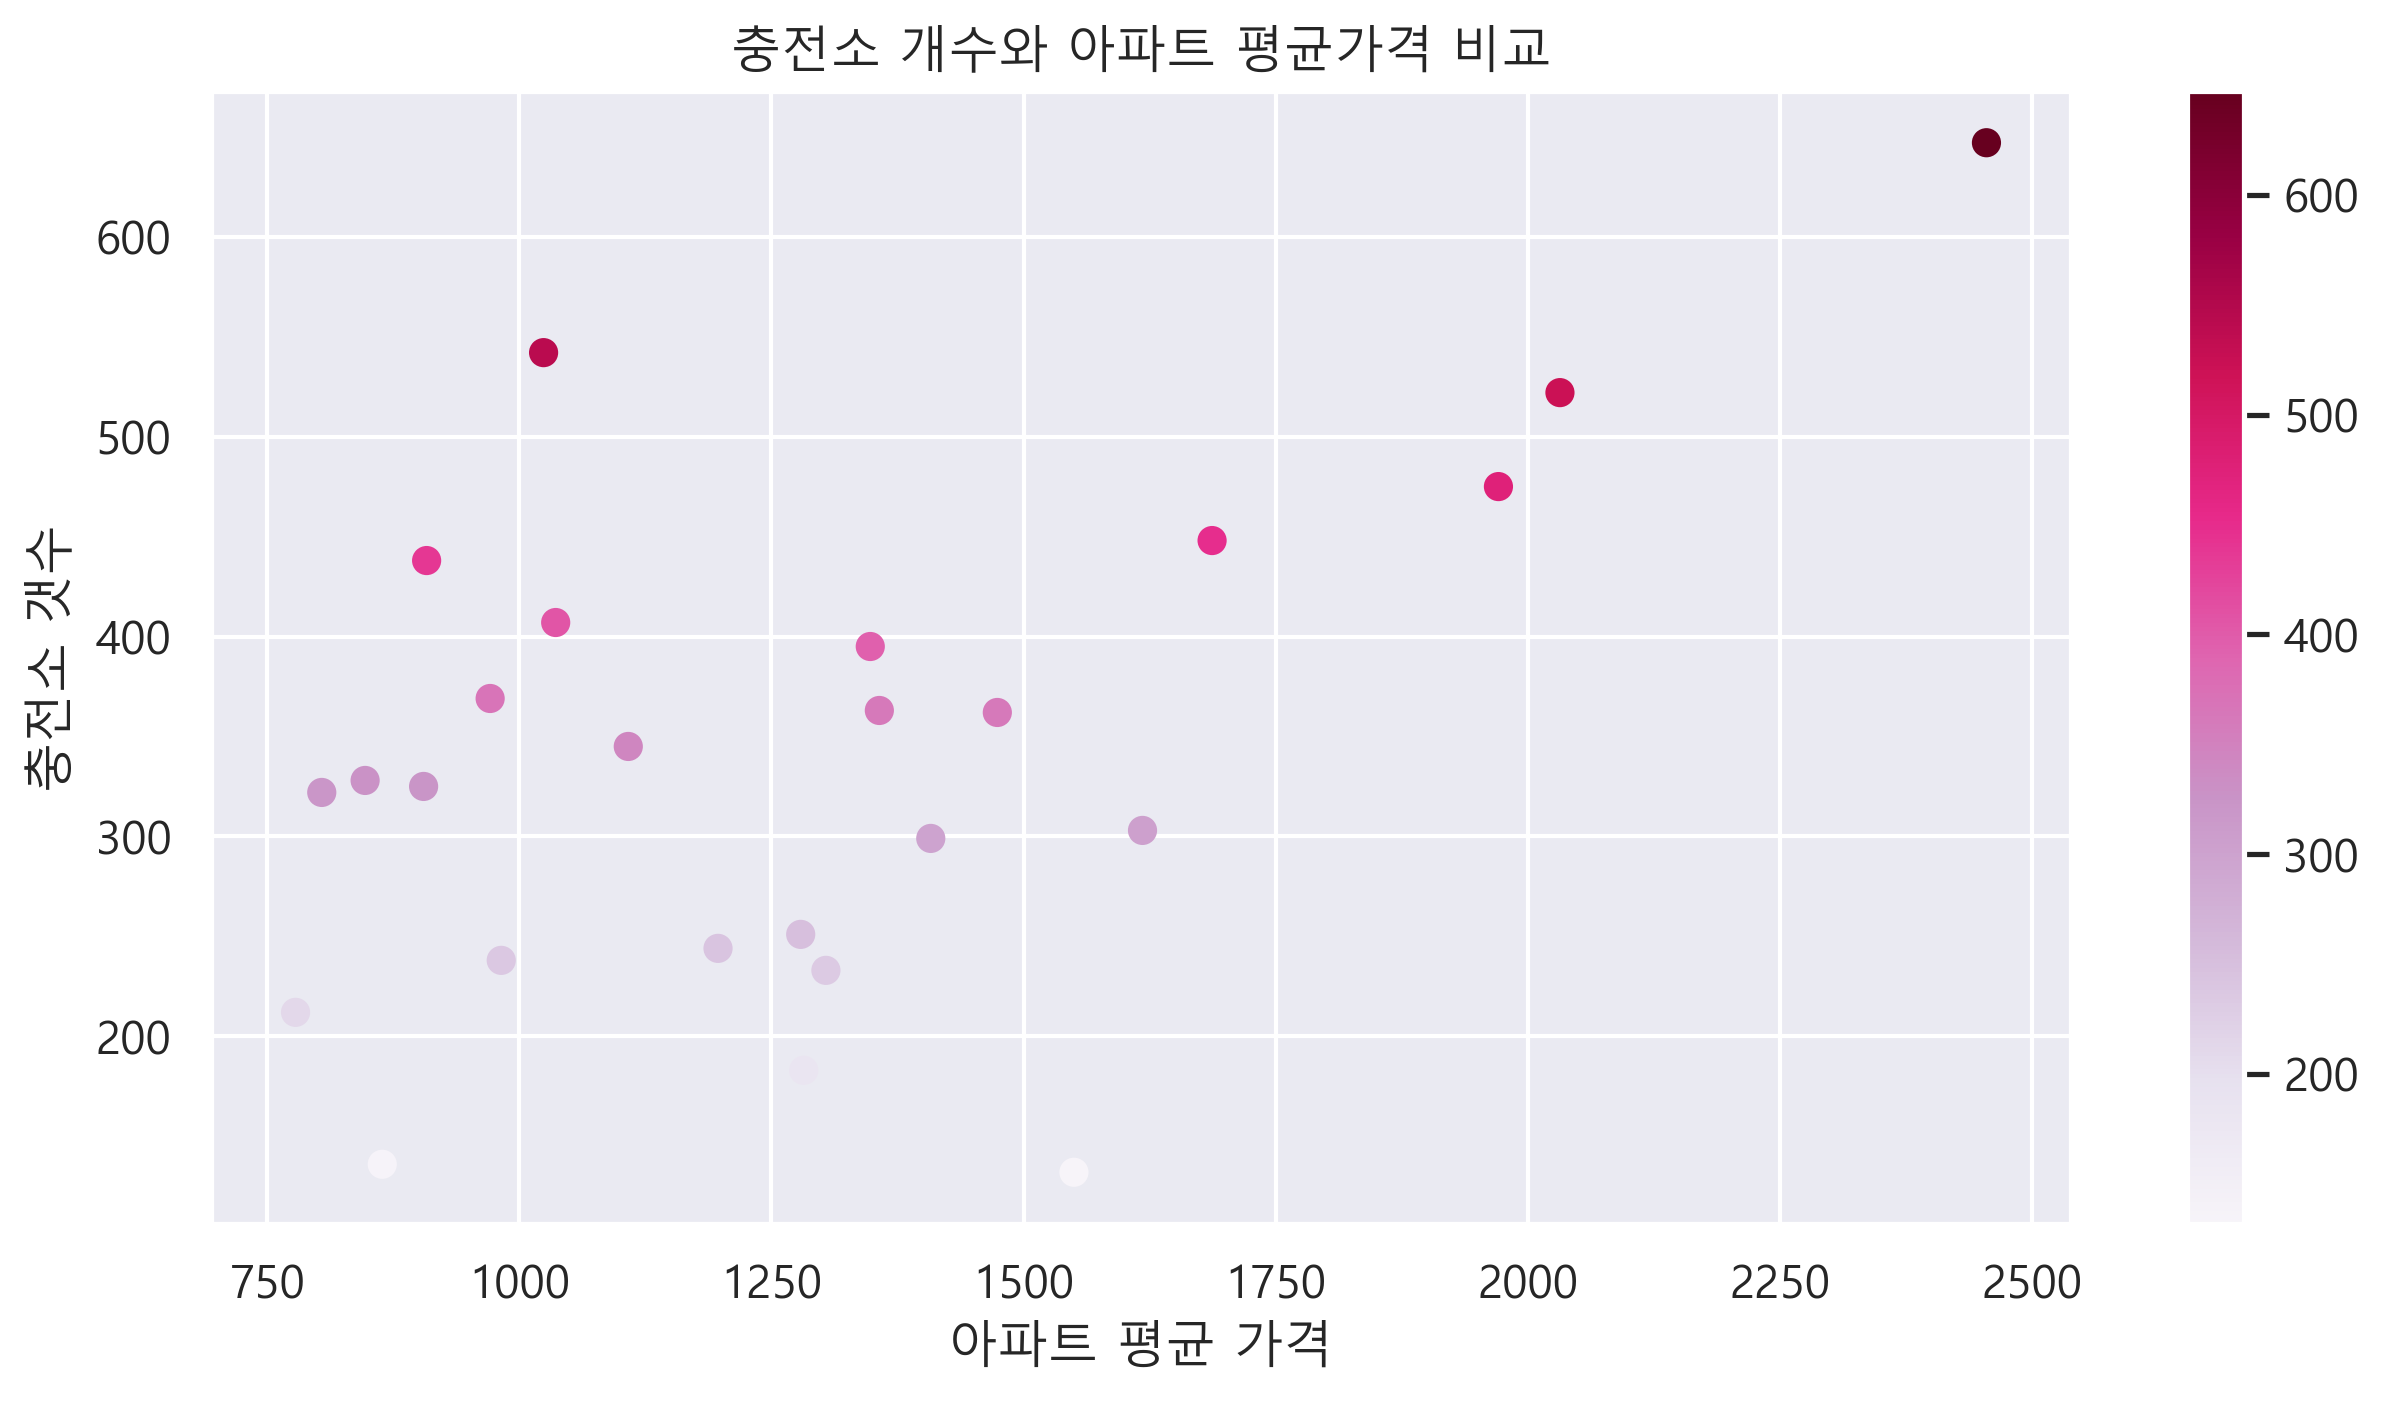

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=300)
plt.scatter(avg_price,gu_num,c=gu_num,cmap='PuRd') 
plt.colorbar()
plt.rc('font',family='Malgun Gothic') # 한글 깨짐 방지
plt.title('충전소 개수와 아파트 평균가격 비교')
plt.xlabel('아파트 평균 가격')
plt.ylabel('충전소 갯수')
plt.show()

### 3.3 막대그래프 시각화

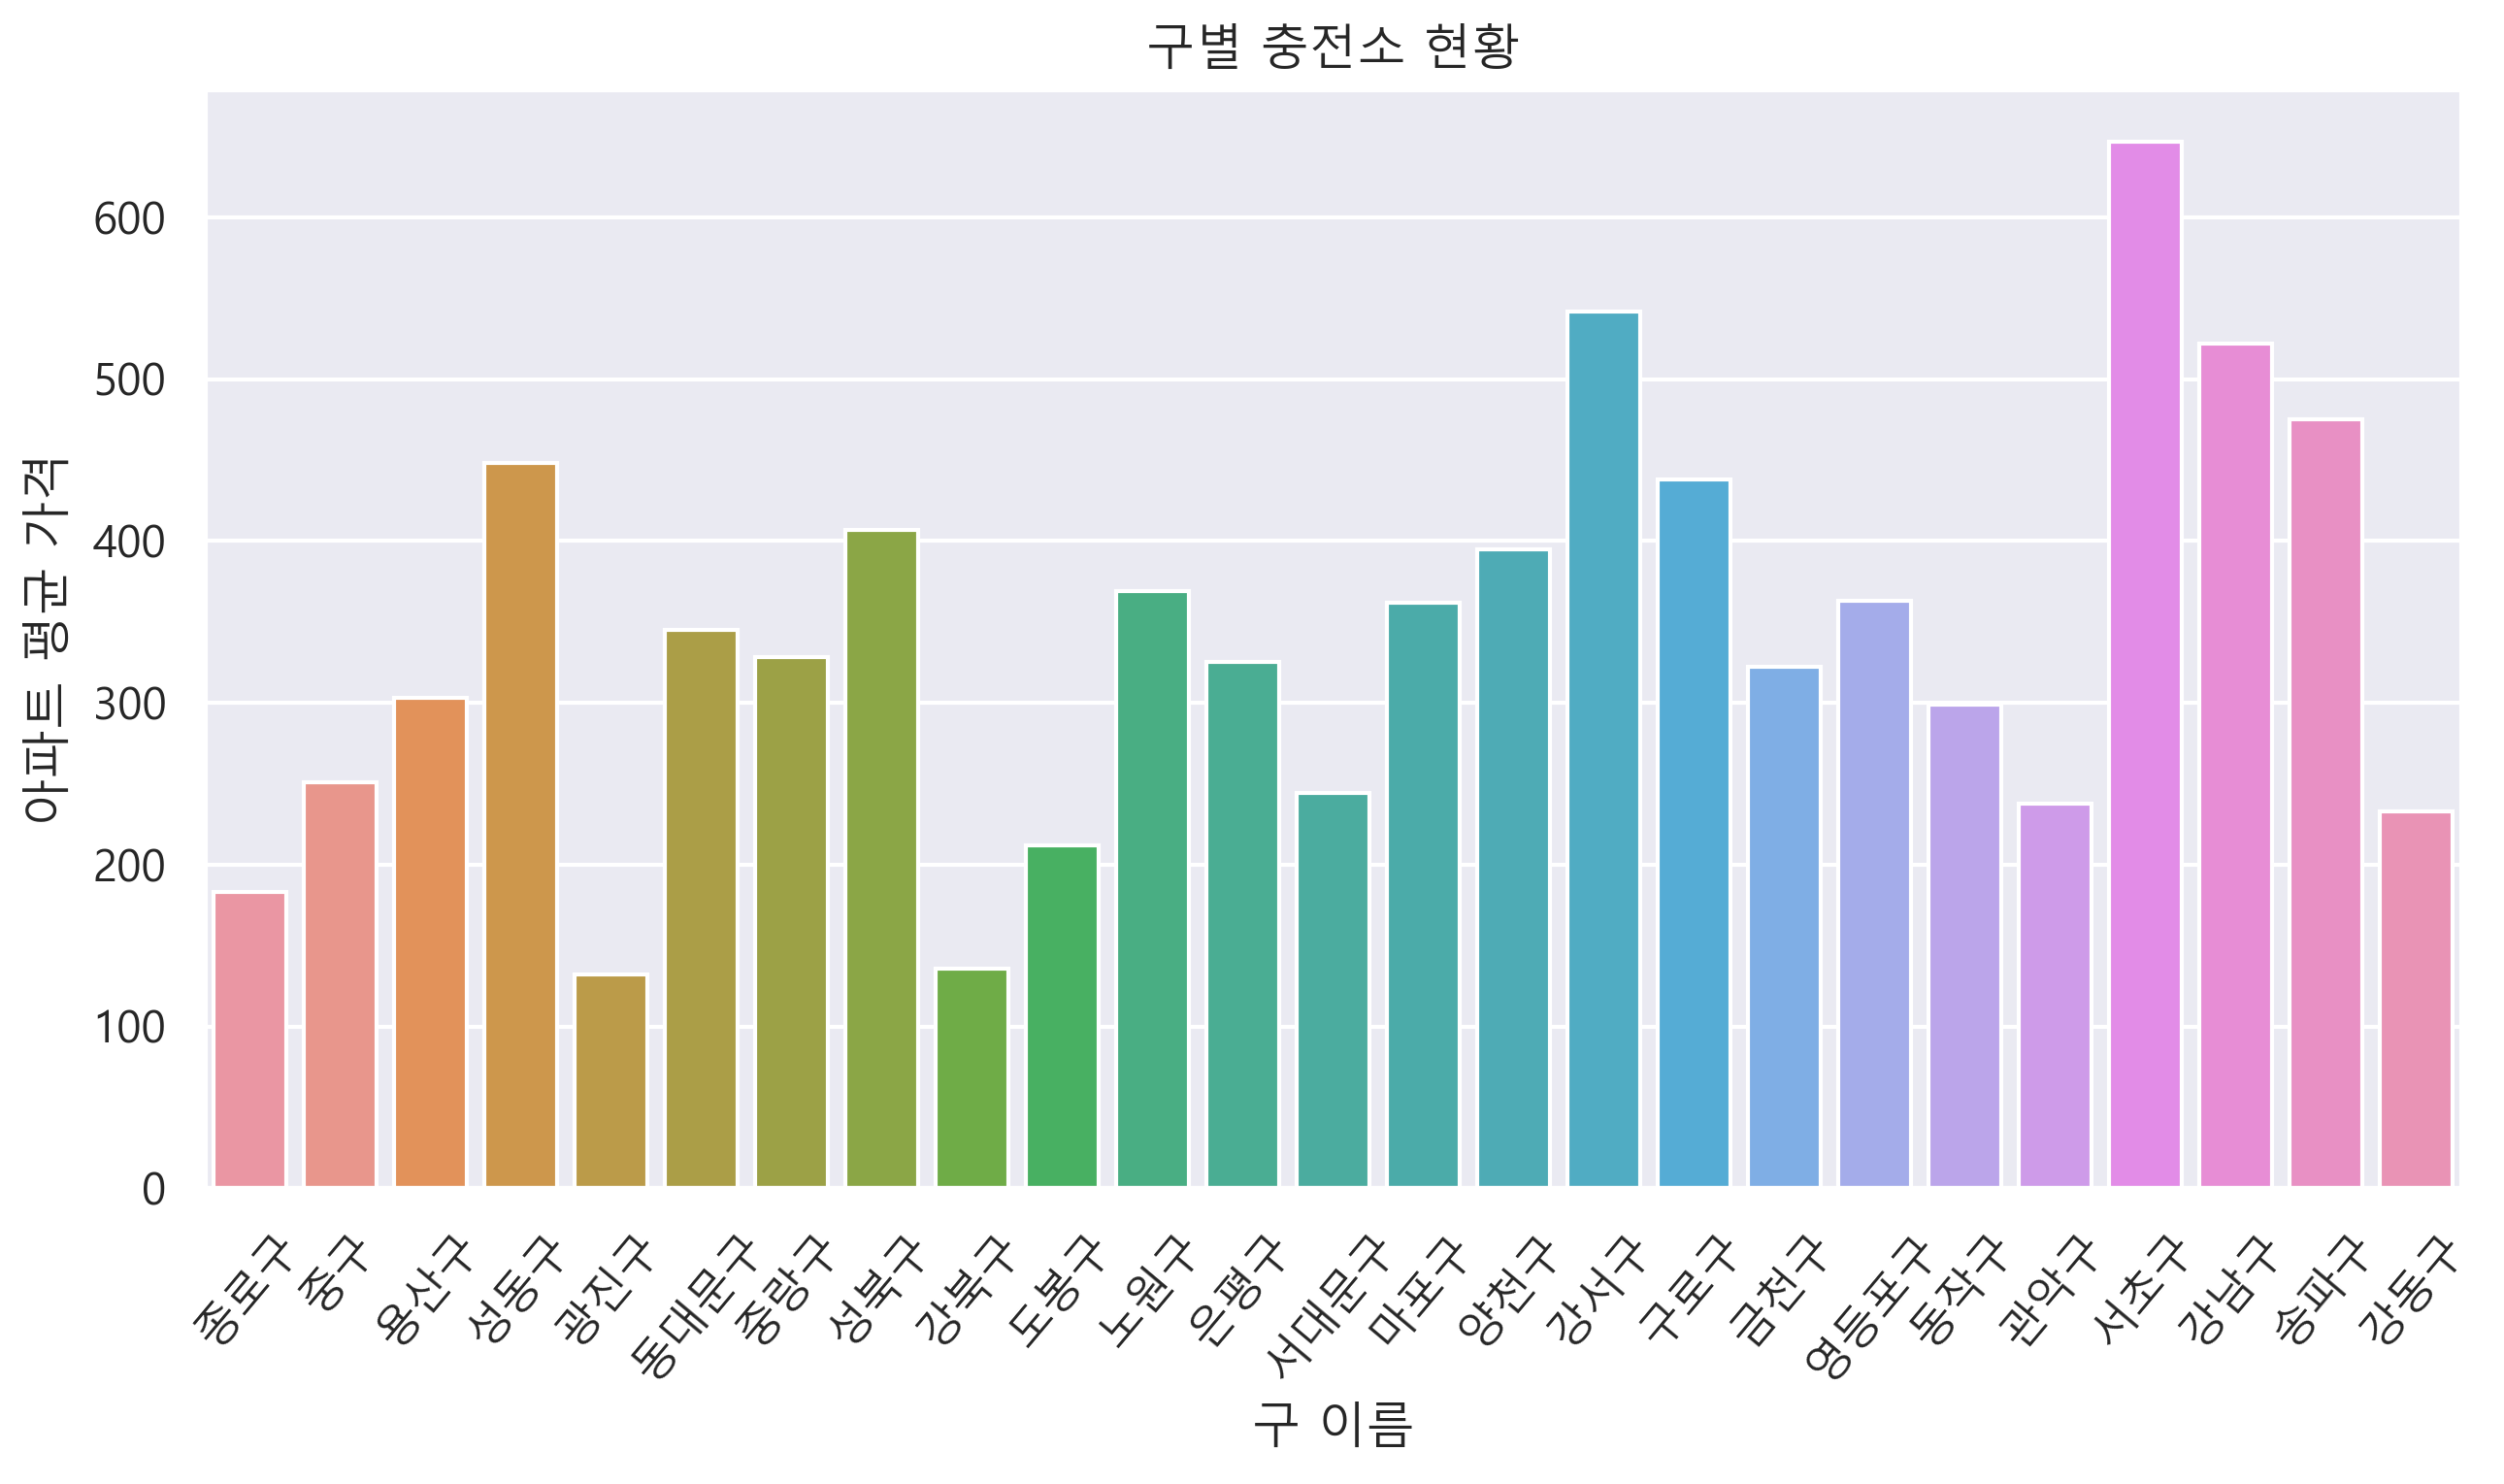

In [22]:
import seaborn as sns # plt처럼 시각화 패키지
sns.set()

plt.rc('font',family='Malgun Gothic') # 한글 깨짐 방지
plt.figure(figsize=(10,5),dpi=300) # 크기 조절
plt.xticks(rotation=50) #x축 조절
sns.barplot(gu,gu_num) # seaborn 패키지 이용하면 무지개색
plt.title('구별 충전소 현황')
plt.xlabel('구 이름')
plt.ylabel('아파트 평균 가격')
plt.show()

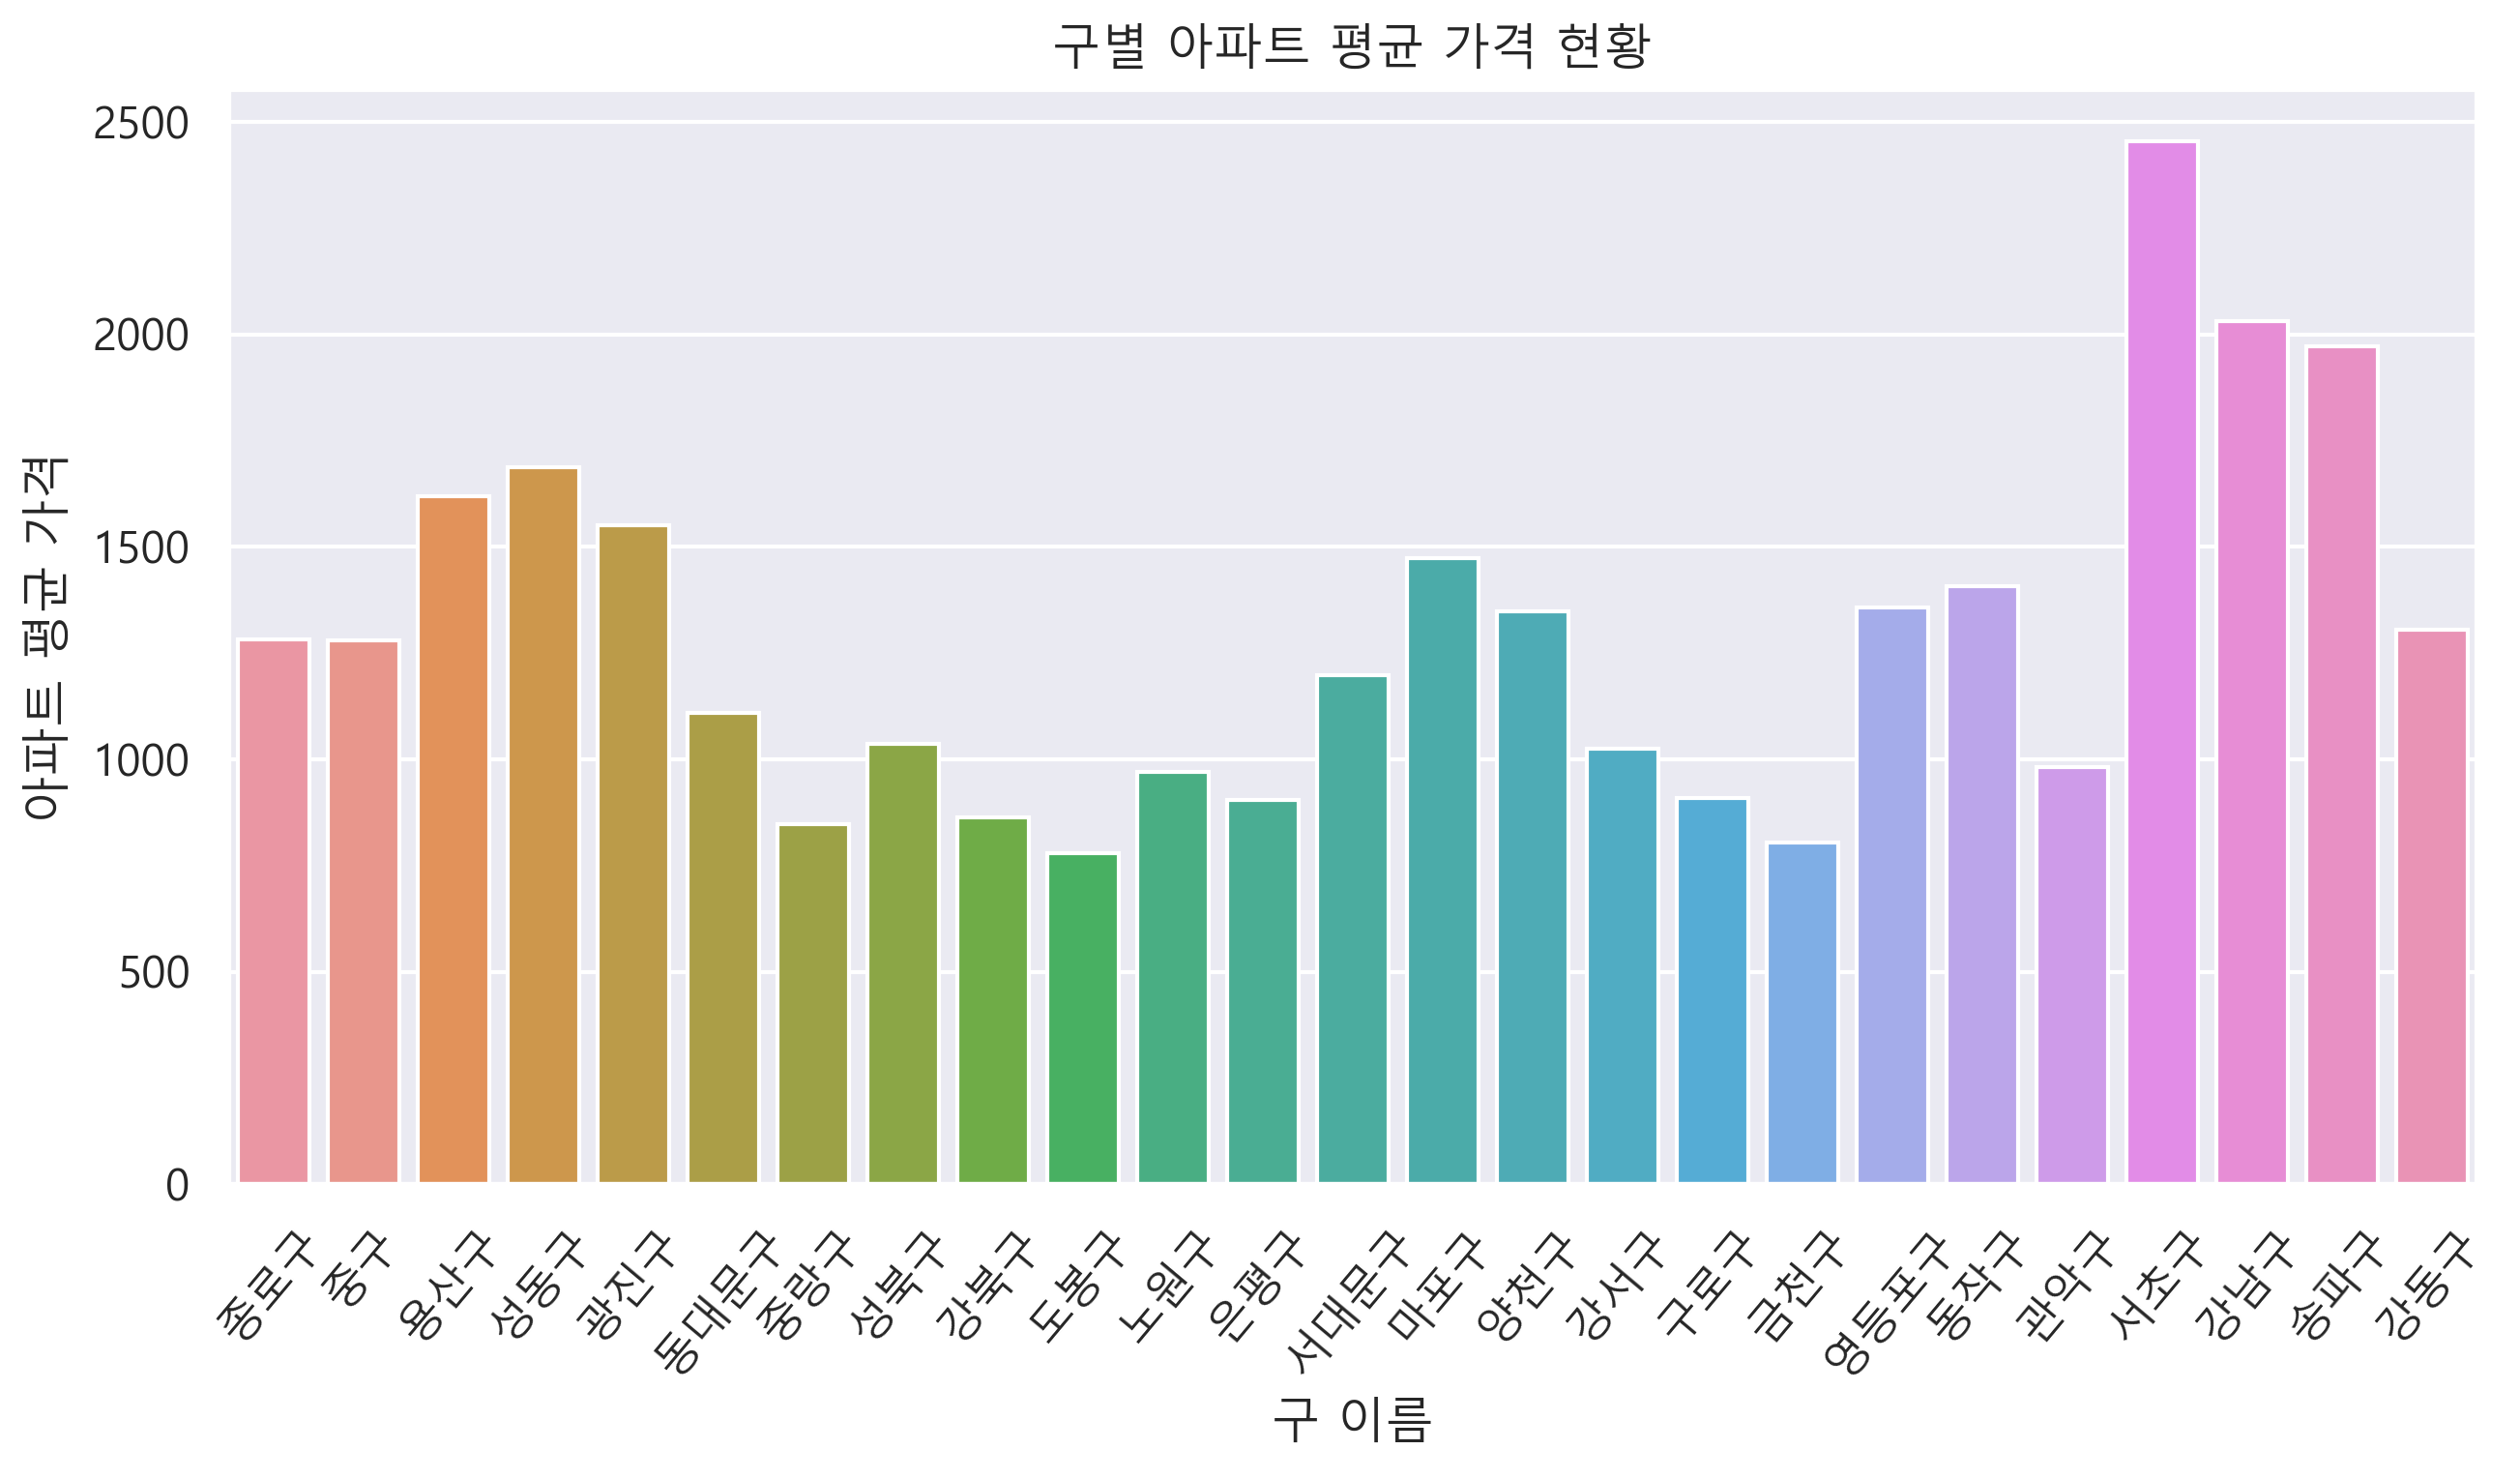

In [21]:
plt.figure(figsize=(10,5),dpi=300)
plt.rc('font',family='Malgun Gothic') # 한글 깨짐 방지
plt.xticks(rotation=50) 
sns.barplot(gu,avg_price)
plt.title('구별 아파트 평균 가격 현황')
plt.xlabel('구 이름')
plt.ylabel('아파트 평균 가격')
plt.show()

### 3.4 시각화 결론

In [ ]:
# 산점도에서나 두 막대그래프를 비교했을 때 완전히 일치하지는 않지만 어느정도 유사점이 있음.

# 이러한 유사점이 특히 집값이 비싼 지역들에서 크게 나타남

# 따라서 전기차 충전소가 많으면 집값이 비싸다기 보다는

# 집값이 비싼 지역의 사람들 -> 전기차 구매를 많이 함 -> 전기차 충전소가 많다

## 4. 어려웠거나 아쉬웠던 점

In [ ]:
# 어려웠던점 1. 공공데이터포탈에서 OPEN API를 가져올 때 

# 계속해서 SERVICEKEY IS ERROR라는 오류가 발생해서 어려움이 많았다

In [ ]:
# 어려웠던 점 2. 지도 시각화에 있어서 원 그래프를 나타내거나 그래프를 겹치는 등

#  시각화에 있어 다양한 시도했으나 어려움

In [ ]:
# 아쉬웠던 점 1. 크롤링 및 다운받은 데이터를 SQL에 담아보지 못한 점

In [ ]:
# 아쉬웠던 점 2. 좀 더 다양한 데이터를 활용해서 분석해보지 못한 점

## 발표를 마치겠습니다 ##